* The internet is an absolutely massive source of data. Unfortunately, the vast majority if it isn’t available in 
* conveniently organized CSV files for download and analysis.
* If we  want to capture data from many websites, - answer is  web scraping.

### Web Scraping - Automatic Gathering of Information from the Web
* Writing some code that will fetch some information from the Web
* In todays session we’re going to cover how to do web scraping with Python from scratch, 

### Why would you scrape the Web
* Why does someone have to collect such large data from websites?
* To collect data from online shopping websites and use it to compare the prices of products.
* To collect email ID and then send bulk emails
* To collect data from Social Media websites such as Twitter to find out what’s trending.
* To collect a large set of data (Statistics, General Information, Temperature, Weather etc.) from websites, which can be  analyzed and used for  R&D.
* Pick up song lyrics from a specific Album but you dont want clicking around and doing copy paste
* Better way is to automate this extraction process and pull out the informatiom from the HTML script
* Automated Job Search: Collect information about job openings and interviews 

### Objective:
* The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form.
* Case Study: Automatic Gathering of Information about Laptops from "flipkart"

### Is it legal? 
* Some websites explicitly allow web scraping. Others explicitly forbid it. 
* Many websites don’t offer any clear guidance one way or the other.
* Before scraping any website, we should look for a terms and conditions page to see if there are explicit rules about scraping. If there are, we should follow them. If there are not, then it becomes more of a judgement call.

### Guidelines
* Remember, though, that web scraping consumes server resources for the host website. If we’re just scraping one page once,
* that isn’t going to cause a problem. But if our code is scraping 1,000 pages once every ten minutes, 
* that could quickly get expensive for the website owner.

* it’s also a good idea to follow these best practices:

* Never scrape more frequently than you need to.
* Consider caching the content you scrape so that it’s only downloaded once as you work on the code you’re using to filter
* and analyze it, rather than re-downloading every time you run your code
* Consider building pauses into your code using functions like time.sleep() to keep from overwhelming servers with too many
*requests in too short a timespan.

###  How to do Web Scraping?
#### To extract data using web scraping with python, you need to follow these basic steps:

* Find the URL that you want to scrape
* Inspecting the Page
* Find the data you want to extract
* Write the code
* Run the code and extract the data
* Store the data in the required format 

In [ ]:
# Step1:  Find the URL that you want to scrape
# Inspect the  Flipkart website to extract the Price, Name, and Rating
# Specification of Laptops. 
# "https://www.flipkart.com/search?q={0}&page={1}"

In [ ]:
#Step 2: Inspect the page
# To inspect the page, just right click on the element and click on “Inspect”. 
# You will see a “Browser Inspector Box” open.

In [ ]:
#Step 3: Find the data you want to extract
# Here we are interested in the name, price, ratings and Specifications of several Laptops
# Specifications include cpu, ram, os, hd, display
# So, we inspect the page to see, under which tag the data we want to scrape is nested.
# we see that the Price, Name, and Rating which is in the “div” tag respectively

In [10]:
# Step 4: How to write code  to extract this information
#First, you’ll want to get the site’s HTML code into your Python script so that you can interact with it.

#page = requests.get(URL)
#This code performs an HTTP request to the given URL.
# It retrieves the HTML data that the server sends back and  stores that data in a Python object.
# For this task, you’ll use Python’s requests library. 
# Type the following in your terminal to install it: $ pip3 install requests

In [ ]:
# Pick the relevant data
# You can parse an HTML response with Beautiful Soup and begin to pick out the relevant data.
# The data we want to extract is nested in <div> tags. So, I will find the 
# div tags with those respective class-names, 
# extract the data and store the data in a variable. Refer the code below:

In [ ]:
# Step 5 and 6: Run the code and store the data in a required format either a csv file or a dataframe

In [ ]:
pip install fake-useragent

### Let us execute Steps 1 to 6 in a Python code

In [1]:
# Import Required Libraries
import requests      #send request to HTML page
import bs4
from bs4 import BeautifulSoup     #python library for extracting data

from fake_useragent import UserAgent

import pandas as pd                #Further Analysis of the extracted Data
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Initialization of the lists to store the extracted data
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form,
count=0                  # Intialize search row count
products=[]              #List to store name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product
#specifications = []     #List to store specifications of the product
cpu = []                 #List to store CPU specifications of the product
ram = []                 #List to store RAM specifications of the product
os = []                  #List to store OS specifications of the product
hd = []                  #List to store HDD specifications of the product
display = []             #List to store Display specifications of the product
df=pd.DataFrame()        #Initialize Dataframe

In [3]:
# Creating an User agent  pip insatll fake-useragent
# A User agent acts as a bridge between the user and the internet . 
# It gives the webserver necessary information about your browser, software, device type and etc.
# According to this information the web servers can display different webpages for you
# The web server uses this information to adapt the content to specific web browsers and different OS
# https://pypi.org/project/fake-useragent/    # read here
 
user_agent = UserAgent() # Dummy User Agent
print(user_agent)

In [4]:
# Set the product name. we are searching for laptops
# The extracted data will be related to that product.\ # Search for Laptops
product_name = 'laptop'

In [5]:
# Find Elements by ID
#To extract data from multiple pages of the product listing we’re going to use a for loop.
# The range will specify the number of pages to be extracted

url = "https://www.flipkart.com/search?q={0}&page={1}" 
print( url.format(product_name,1))          #run and check this  

https://www.flipkart.com/search?q=laptop&page=1


In [10]:
for i in range(1,3): # Limiting search to 3 pages due to multiple redirection issues for higher number of pages
    url = "https://www.flipkart.com/search?q={0}&page={1}" # Scrape data from Flipkart.com
    url = url.format(product_name,i)
    #print(url)
    
    ## Getting the reponse from the page using get method of requests module
    page= requests.get(url, headers ={"User_agent": user_agent.chrome})
    #print(page)
    
    ## Storing the content of the page in a variable
    html=page.content
    #print(html)
    
    # To Extract data from html file --- Creating BeautifulSoup object
    page_soup=bs4.BeautifulSoup(html, "html.parser")
    
    #print(page_soup.prettify())     #will show as a nested html file
    #it gives the visual representation of the parse tree created from the raw HTML content.

    
    #Iterate over page_soup.find_all('p')   
    # this will iterate over all paras
    #print(page_soup.find_all('p')[0].get_text())

    ## Decoding the tags
    #('a',{'class':'_1fQZEK'})

    for containers in page_soup.findAll('a',{'class':'_1fQZEK'}):
        name=containers.find('div', attrs={'class':'_4rR01T'})
        price=containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=containers.find('div', attrs={'class':'_3LWZlK'})
        
        specification = containers.find('div', attrs={'class':'fMghEO'})
        
        ## Splitting integrated specification into individual CPU, RAM, OS, HDD and Display specifications
        for col in specification:
            col=col.find_all('li', attrs={'class':'rgWa7D'})
            cput =col[0].text
            ramt = col[1].text
            ost = col[2].text
            hdt = col[3].text
            displayt = col[4].text
        
        products.append(name.text) # Add product name to list
        
        prices.append(price.text) # Add price to list
        
        #specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
        
        cpu.append(cput) # Add CPU specifications to list
        
        ram.append(ramt) # Add RAM specifications to list
        
        os.append(ost) # Add OS specifications to list
        
        hd.append(hdt) # Add HDD specifications to list
        
        display.append(displayt) # Add Display specifications to list
        
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN') # Add Rating to list
        
        count=count+1 # Increment row count
    
    ## Create a dataframe with structured data from all searched rows
    df = pd.DataFrame({'Product Name':products,'CPU':cpu,'RAM':ram,'OS':os,"HD Capacity":hd,'Display':display,'Price':prices,'Rating':ratings,})

print('No. of rows searched',count)

No. of rows searched 48


In [ ]:
#For extracting data from soup you need to specify the html tags you want to retrieve the data from.
#You could use inspect element on the webpage.

## Recap of the html tags
* p - A paragraph of text
* h1- A top-level heading
* h2, h3 - A lower-level heading
* li- An item in a list
* img - An image
* tr- A row in a table
* td - A cell in a table
* a - A link
* div - A block of space on the page (generic)
* span - A portion of text on the page (generic)
* meta - Information about the page that is not shown

In [ ]:
### find() and find_all() function in Beautiful Soup
* To extract a single tag, we can instead use the find_all method, which will find all the instances of a tag on a page
* soup.find_all('p')    # this iwll iterate over all paras* soup.find_all('p')[0].get_text()
 
* Classes and ids are used by CSS to determine which HTML elements to apply certain styles to.
* We can also use them when scraping to specify specific elements we want to scrape. 

In [11]:
print(df.shape)
df.head() # Preview dataframe

(48, 8)


,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,Apple MacBook Pro Core i5 8th Gen - (8 GB/512 ...,Intel Core i5 Processor (8th Gen),8 GB DDR3 RAM,Mac OS Operating System,512 GB SSD,33.78 cm (13.3 inch) Display,"₹1,21,500",4.4
1,Apple MacBook Air Core i5 10th Gen - (8 GB/512...,Intel Core i5 Processor (10th Gen),8 GB LPDDR4X RAM,Mac OS Operating System,512 GB SSD,33.78 cm (13.3 inch) Display,"₹1,09,900",4.5
2,HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹23,990",4
3,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹52,990",4.2
4,Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"₹36,990",4.4


In [12]:
df.tail() # Preview dataframe

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
43,Mi Notebook 14 Core i5 10th Gen - (8 GB/512 GB...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹44,999",4.3
44,Dell Vostro Core i5 11th Gen - (8 GB/1 TB HDD/...,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,"₹50,390",4.7
45,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹36,990",4.3
46,Dell Inspiron 3505 Athlon Dual Core 3150U - (4...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"₹29,650",4.8
47,HP 14s Core i3 10th Gen - (4 GB/256 GB SSD/Win...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"₹33,490",4.1


In [13]:
df.isnull().sum() # Check for null values

Product Name    0
CPU             0
RAM             0
OS              0
HD Capacity     0
Display         0
Price           0
Rating          0
dtype: int64

In [14]:
df.isna().sum() # Check for 'NaN' values

Product Name    0
CPU             0
RAM             0
OS              0
HD Capacity     0
Display         0
Price           0
Rating          0
dtype: int64

In [15]:
df.info() # Dataframe Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
Product Name    48 non-null object
CPU             48 non-null object
RAM             48 non-null object
OS              48 non-null object
HD Capacity     48 non-null object
Display         48 non-null object
Price           48 non-null object
Rating          48 non-null object
dtypes: object(8)
memory usage: 3.1+ KB


In [16]:
df.describe() # Describe Data before cleaning and dtype conversion

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
count,48,48,48,48,48,48,48,48
unique,43,16,5,3,5,5,35,11
top,Apple MacBook Air Core i5 10th Gen - (8 GB/512...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹36,990",4.3
freq,2,13,23,40,19,20,3,11


In [17]:
df.dtypes # Check data types of columns

Product Name    object
CPU             object
RAM             object
OS              object
HD Capacity     object
Display         object
Price           object
Rating          object
dtype: object

In [18]:
# Identify rows with wrongly positioned data i.e. a particular data misplaced under a different column
a=df[(~df['CPU'].str.contains('Processor'))|(~df['RAM'].str.contains('RAM'))|(~df['OS'].str.contains('Operating'))|(~df['HD Capacity'].str.contains('GB|TB'))].index
a # Save index information of such rows

Int64Index([], dtype='int64')

In [30]:
# Identify rows with wrongly positioned data i.e. a particular data misplaced under a different column
a=df[(~df['CPU'].str.contains('Processor'))|(~df['RAM'].str.contains('RAM'))|(~df['OS'].str.contains('Operating'))|(~df['HD Capacity'].str.contains('GB|TB'))].index
a # Save index information of such rows

Int64Index([], dtype='int64')

In [31]:
df=df.drop(a, axis=0) # Drop rows with wrongly positioned data elements 

In [32]:
# Format Price column to remove ₹ and delimiter ',' used for the thousandth place 
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',' : ''}, regex=True)
df.head() # Check if formatting is correct

AttributeError: Can only use .str accessor with string values!

In [33]:
# Convert numeric columns in string format to float for mathematical and graphic operations
for i in range(6,8,1):
    df.iloc[:,i]= df.iloc[:,i].astype(float).copy()

In [34]:
df.dtypes # Check data types of columns

Product Name     object
CPU              object
RAM              object
OS               object
HD Capacity      object
Display          object
Price           float64
Rating          float64
dtype: object

In [35]:
df.describe() # Describe Data after cleaning and dtype conversion

,Price,Rating
count,48.000000,47.000000
mean,54861.395833,4.359574
std,25227.891678,0.227137
min,21990.000000,3.800000
25%,36740.000000,4.300000
50%,51990.000000,4.400000
75%,61990.000000,4.500000
max,121500.000000,4.800000


In [36]:
# Save cleaned and processed data to a CSV file
df.to_csv('WebScrapingLaptops.csv',index=False)

# Univariate Analysis Plot Histograms and  BoxPlots

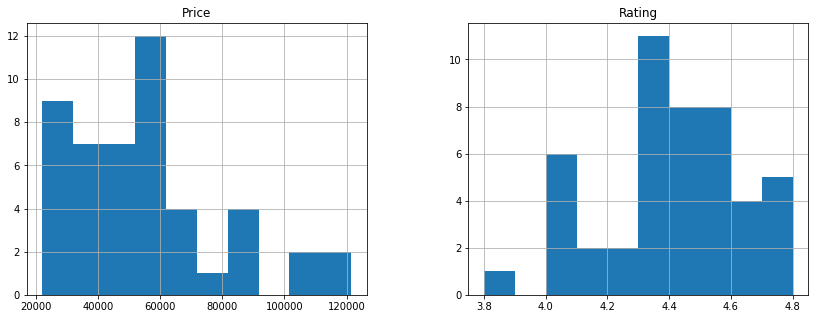

In [41]:
# Plot Histograms of Price and Rating
df.hist(figsize=(14,5))
plt.show()


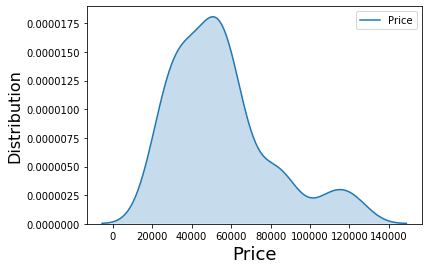

C:\Users\Jigar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Jigar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


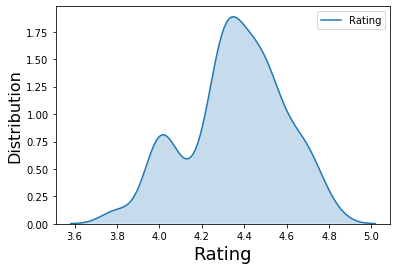

In [38]:
# Plot Distibution Plots of Price and Rating
columns=['Price','Rating']
for i in columns:
    sns.kdeplot(df[i],shade=True)
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Distribution', fontsize=16)
    plt.show()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Rating
0,Apple MacBook Pro Core i5 8th Gen - (8 GB/512 ...,Intel Core i5 Processor (8th Gen),8 GB DDR3 RAM,Mac OS Operating System,512 GB SSD,33.78 cm (13.3 inch) Display,121500.0,4.4
29,Apple MacBook Pro Core i5 8th Gen - (8 GB/512 ...,Intel Core i5 Processor (8th Gen),8 GB DDR3 RAM,Mac OS Operating System,512 GB SSD,33.78 cm (13.3 inch) Display,121500.0,4.4


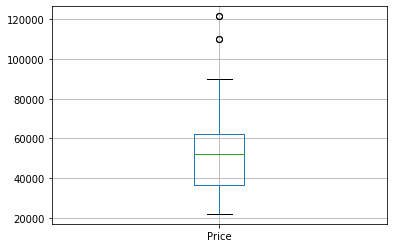

In [42]:
# Boxplot of Price  using Dataframe method
df.boxplot(column='Price',grid=True,figsize=(6,4))
df[df['Price'] > 120000]

In [ ]:
# Box plot of Rating


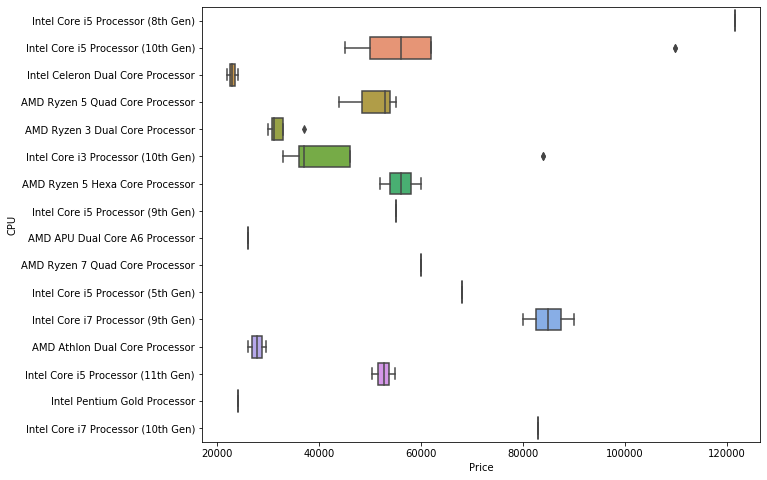

In [40]:
# Bivariate Analysis
# Box plot of CPU and Price
plt.figure(figsize=(10,8))
sns.boxplot(y="CPU",x='Price',data=df)
plt.show()

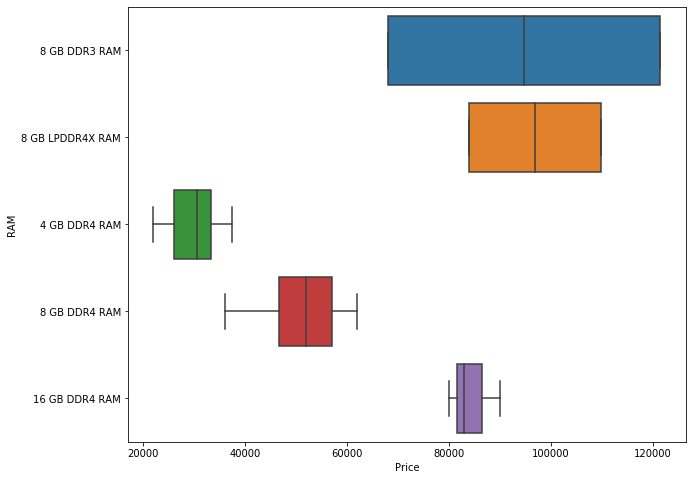

In [43]:
# Box plot of RAM and Price
plt.figure(figsize=(10,8))
sns.boxplot(y="RAM",x='Price',data=df)
plt.show()

In [ ]:
# Box plot of OS and Price
plt.figure(figsize=(10,8))
sns.boxplot(y="OS",x='Price',data=df)
plt.show()

In [ ]:
# Box plot of HDD and Price


In [ ]:
# Box plot of Display and Price


### Bar Graphs using Matplotlib

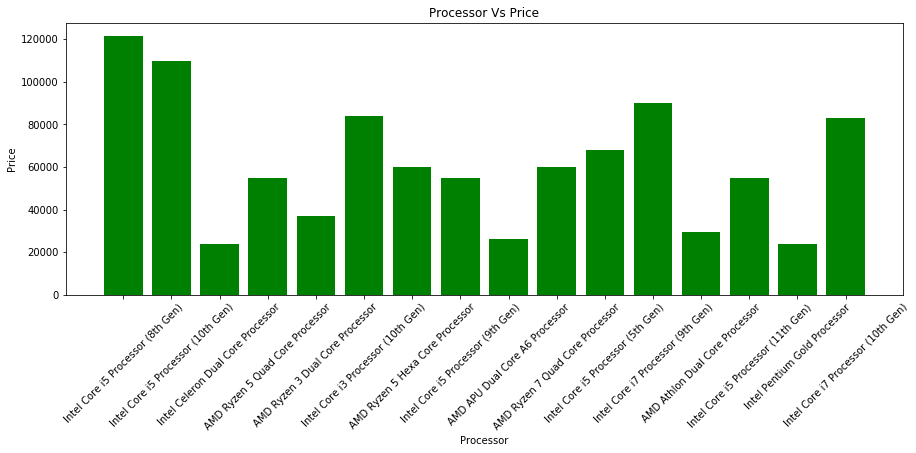

In [56]:
# Bar Graph - Processor Vs Price
# Using plt
plt.figure(figsize=(15,5))
plt.bar(df['CPU'],df['Price'],color='green')
plt.xticks(rotation=45)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor Vs Price')
plt.show()

AttributeError: module 'seaborn' has no attribute 'xticks'

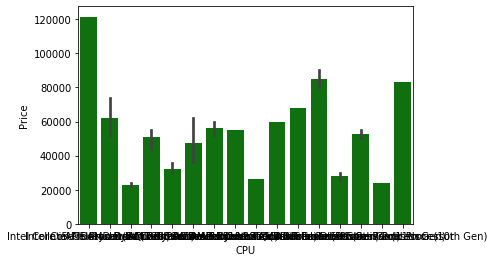

In [58]:
sns.barplot(df['CPU'],df['Price'],color='green',)
sns.xticks(rotation=45)
sns.title('Processor Vs Price')
plt.show()

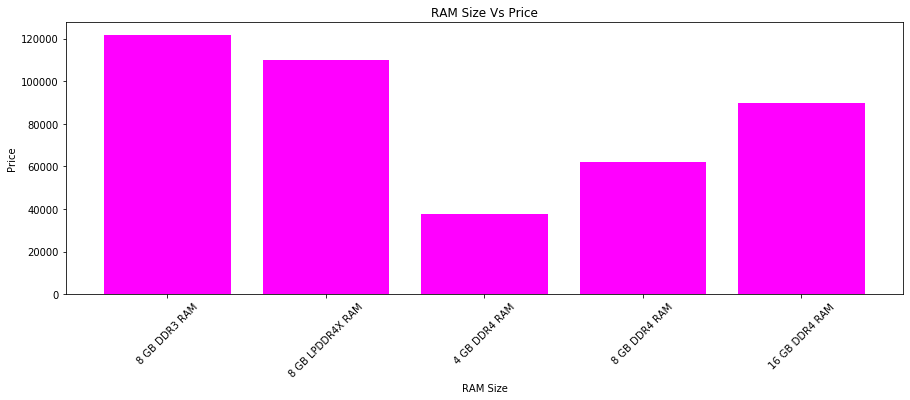

In [45]:
# Bar Graph - RAM Vs Price
plt.figure(figsize=(15,5))
plt.bar(df['RAM'],df['Price'],color='fuchsia')
plt.xticks(rotation=45)
plt.xlabel('RAM Size')
plt.ylabel('Price')
plt.title('RAM Size Vs Price')
plt.show()

In [ ]:
#

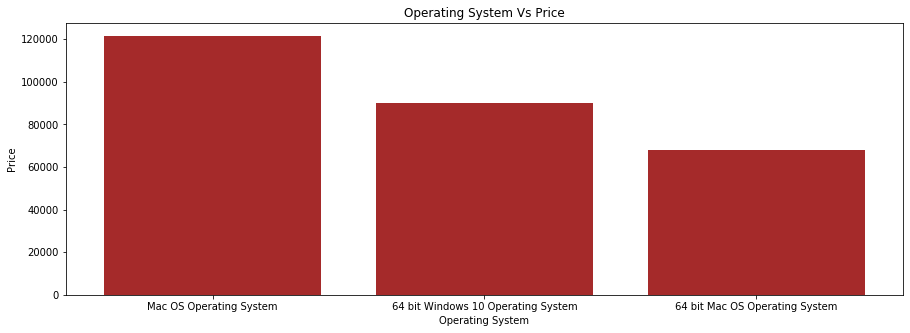

In [46]:
# Bar Graph - OS Vs Price
plt.figure(figsize=(15,5))
plt.bar(df['OS'],df['Price'],color='brown')
plt.xticks(rotation=0)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Operating System Vs Price')
plt.show()

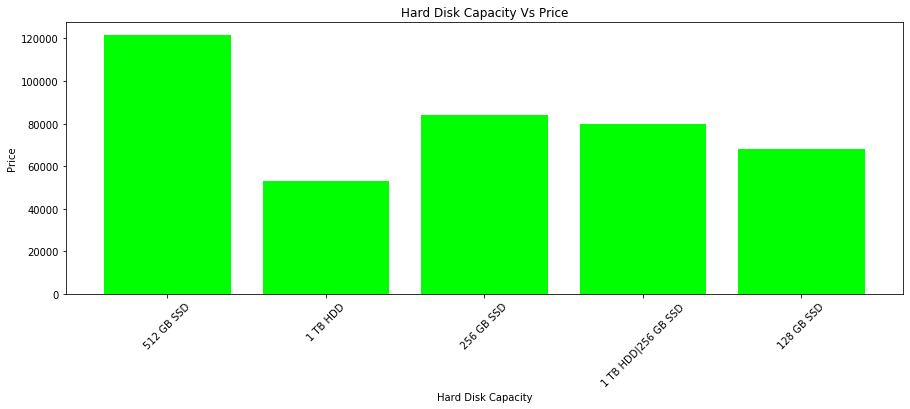

In [47]:
# Bar Graph - HDD Vs Price
plt.figure(figsize=(15,5))
plt.bar(df['HD Capacity'],df['Price'],color='lime')
plt.xticks(rotation=45)
plt.xlabel('Hard Disk Capacity')
plt.ylabel('Price')
plt.title('Hard Disk Capacity Vs Price')
plt.show()

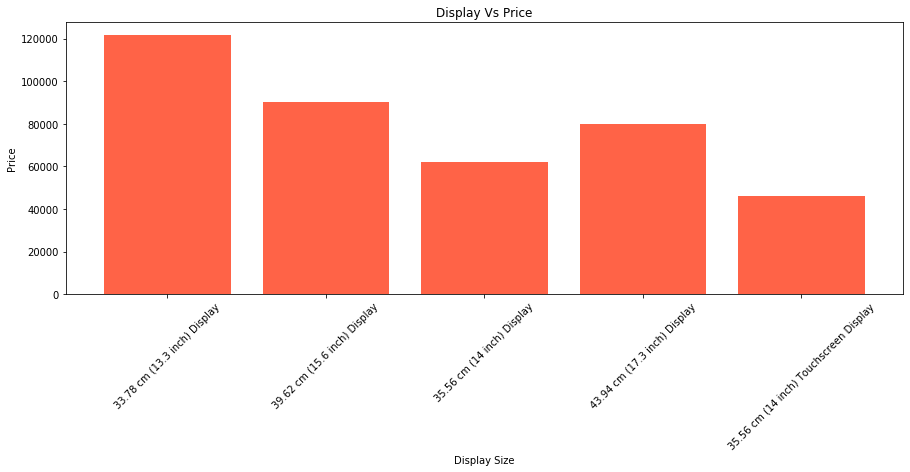

In [48]:
# Bar Graph - Display Vs Price
plt.figure(figsize=(15,5))
plt.bar(df['Display'],df['Price'],color='tomato')
plt.xticks(rotation=45)
plt.xlabel('Display Size')
plt.ylabel('Price')
plt.title('Display Vs Price')
plt.show()

### BarPlots using Seaborn library
* Price versus Categorical Variables

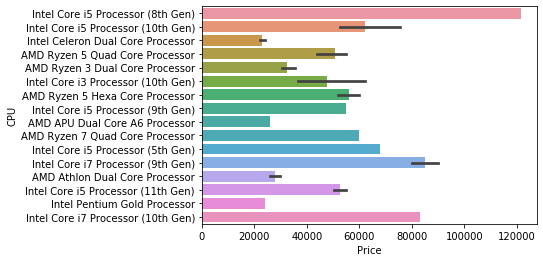

In [49]:
# Bar Plot - Price Vs CPU
# Bar Plot - Price Vs RAM
sns.barplot(x=df.Price, y=df.CPU)

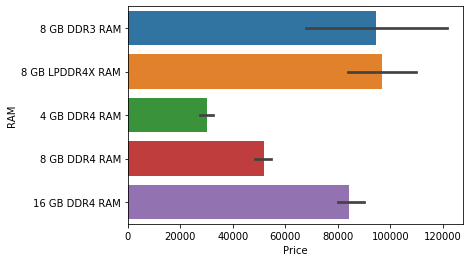

In [50]:
# Bar Plot - Price Vs RAM
sns.barplot(x=df.Price, y=df.RAM)

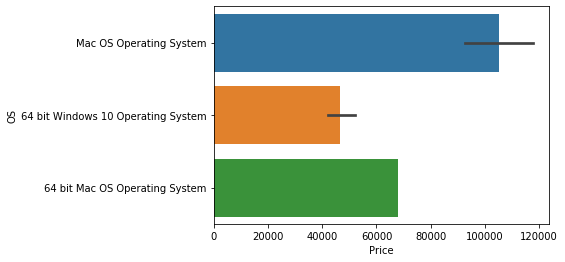

In [51]:
# Bar Plot - Price Vs OS
sns.barplot(x=df['Price'], y=df['OS'])

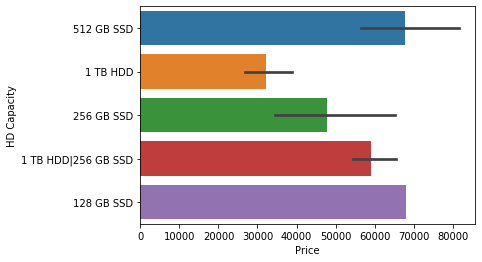

In [52]:
# Bar Plot - Price Vs HDD
sns.barplot(x=df['Price'], y=df['HD Capacity'])

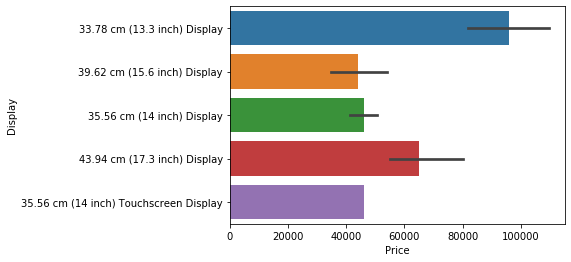

In [53]:
# Bar Plot - Price Vs Display
sns.barplot(x=df['Price'], y=df['Display'])

### BarPlots using Seaborn library
* Categorical Variables versus Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

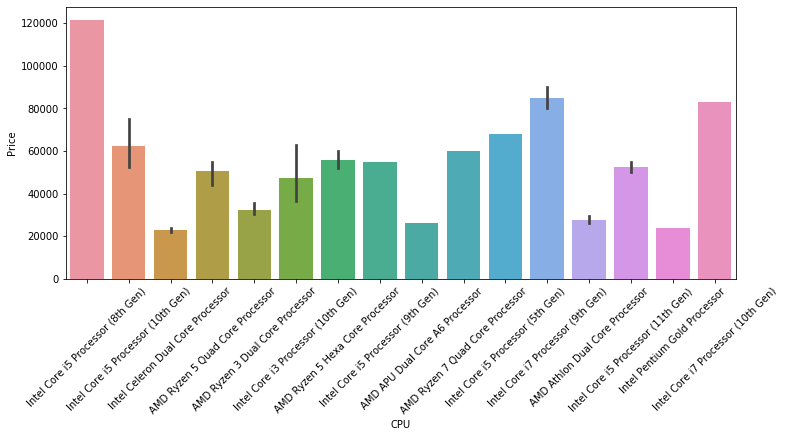

In [54]:
# Bar Plot - CPU Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df['CPU'], y=df['Price'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

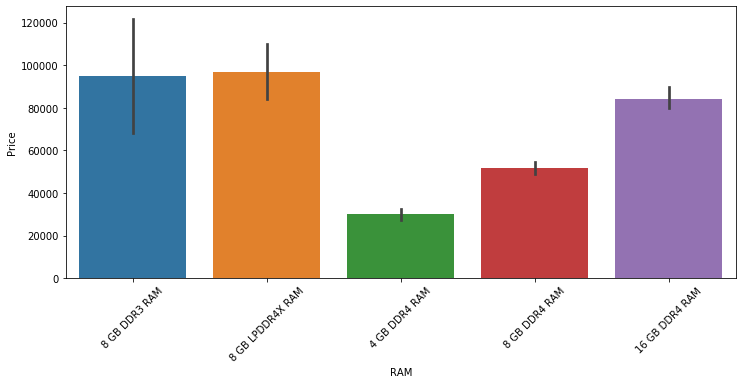

In [55]:
# Bar Plot - RAM Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df['RAM'], y=df['Price'])
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

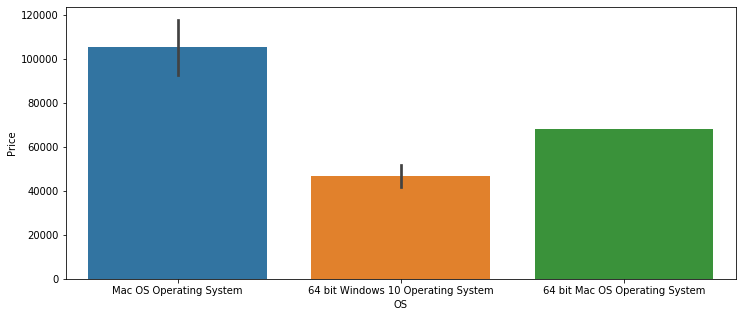

In [59]:
# Bar Plot - OS Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df['OS'], y=df['Price'])
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

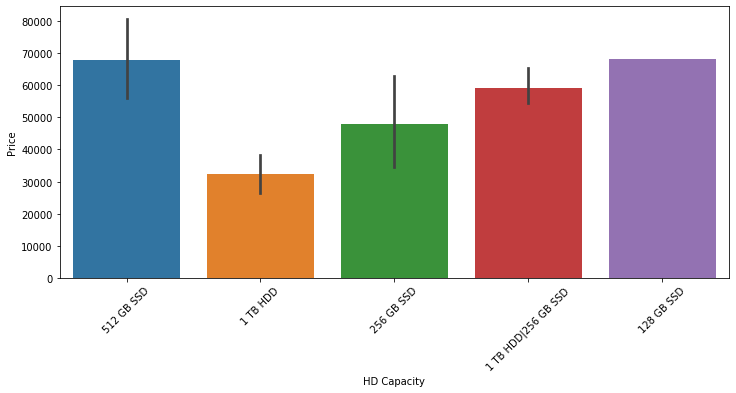

In [60]:
# Bar Plot - HDD Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df['HD Capacity'], y=df['Price'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

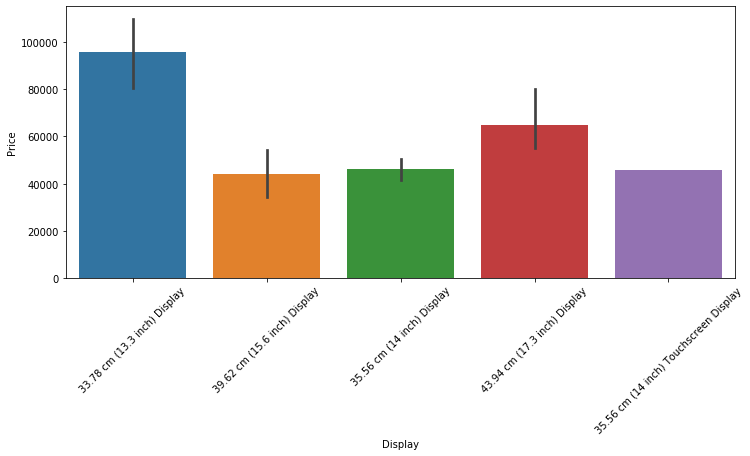

In [61]:
# Bar Plot - Display Vs Price
plt.figure(figsize=(12,5))
sns.barplot(x=df['Display'], y=df['Price'])
plt.xticks(rotation=45)

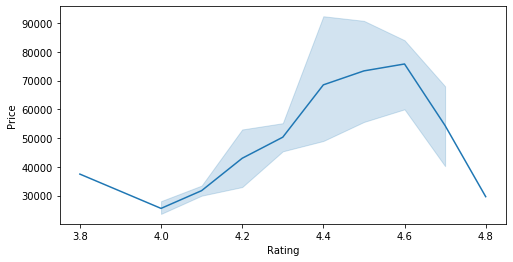

In [62]:
# Line Plot - Rating Vs Price between categorical variables
plt.figure(figsize=(8,4))
sns.lineplot(x=df['Rating'], y=df['Price'])

### You learned how to:
* Inspect the HTML structure of your target site with your browser’s tools
* Gain insight into how to decipher the data encoded in URLs
* Download the page’s HTML content using Python’s requests library
* Parse the downloaded HTML with Beautiful Soup to extract relevant information

In [ ]:
ua = UserAgent()

ua.ie
# Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US);
ua.msie
# Mozilla/5.0 (compatible; MSIE 10.0; Macintosh; Intel Mac OS X 10_7_3; Trident/6.0)'
ua['Internet Explorer']
# Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; GTB7.4; InfoPath.2; SV1; .NET CLR 3.3.69573; WOW64; en-US)
ua.opera
# Opera/9.80 (X11; Linux i686; U; ru) Presto/2.8.131 Version/11.11
ua.chrome
# Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.2 (KHTML, like Gecko) Chrome/22.0.1216.0 Safari/537.2'
ua.google
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/537.13 (KHTML, like Gecko) Chrome/24.0.1290.1 Safari/537.13
ua['google chrome']
# Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11
ua.firefox
# Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16.0.1) Gecko/20121011 Firefox/16.0.1
ua.ff
# Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1
ua.safari
# Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25

# and the best one, random via real world browser usage statistic
ua.random